In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
full = pd.read_csv("./engineer.tsv", sep="\t")
test = pd.read_csv("./engineer_test.tsv", sep="\t")
print(len(full), len(test))

17906 1350


In [3]:
full.head()

,title,abstract,keywords,discipline,category
0,分布式系统中的检查点算法,检查点能够保存和恢复程序的运行状态.它在进程迁移、容错、卷回调试等领域都有重要的应用.本文对...,检查点_分布式程序_异步检查点算法_一致检查点算法,计算机科学与技术,工学
1,轧辊的失效及其修复技术,"轧辊是轧机的主要变形工具,由于自身材质及其所处的恶劣工作条件,经常发生失效乃至报废,通过修复...",冷轧辊_热轧辊_失效_修复_表面改性技术,材料科学与工程,工学
2,一种反激式DC-DC变换器设计与研究,"针对电池电源管理中的开关变换器应用,采用NCP1200电流型PWM控制芯片设计了一种多路隔离...",反激式DC-DC变换器_寄生参数_钳位电路,电气工程,工学
3,航天测控系统卫星鉴定技术研究,"针对基于卫星的航天测控系统精度鉴定技术开展了深入的分析和研究,提出了较为全面的卫星鉴定的思路...",卫星鉴定_SLR卫星_EMBET_高斯-马尔可夫估计_主成分估计,航空宇航科学与技术,工学
4,关于集成化汽车故障诊断系统及其支持技术研究,"集成化汽车故障诊断系统有两种不同的体系结构,可由状态检测、信息融合、故障诊断、网络信息获取以...",汽车_故障诊断_集成系统_网络化,交通运输工程,工学


In [4]:
test.head()

,abstract,discipline
0,"铁路货运量与其影响因素之间关系复杂,单一核函数支持向量机(SVM)难以进行准确描述,而且各因...",交通运输工程
1,"为研究某公路、铁路两用斜拉桥公路桥面钢-混结合段的受力性能,对其进行了非线性有限元分析.同时...",交通运输工程
2,"鉴于堆石体颗粒非均质性与离散性特征,堆石体填筑密实程度质量检测评价中引入了不确定性分析置信水...",交通运输工程
3,"建立轨道过渡段基础刚度突变的轨道振动微分方程,推导单轮作用下轨道变形的解析表达式.利用该解析...",交通运输工程
4,"通过某公路稀浆封层路段的室内试验,发现采用稀浆封层养护的路面的针入度和延度均提高,可知稀浆封...",交通运输工程


In [5]:
test_abs = [item[1]['abstract'] for item in test.iterrows()]
print(len(test_abs))
print(test_abs[0])

1350
铁路货运量与其影响因素之间关系复杂,单一核函数支持向量机(SVM)难以进行准确描述,而且各因素对铁路货运量的影响程度具有差异性,若忽略这种差异性,将难以获得理想的铁路货运量预测结果.为此,本文提出一种基于灰色关联分析(GRA)与混合核函数支持向量机(SVM-mixed)的铁路货运量预测方法.该方法采用灰色关联分析确定各影响因素的权重,再将赋予权重的影响因素作为输入变量,构建多项式核函数与径向基核函数线性组合的SVM-mixed预测模型.针对SVM-mixed参数难以确定问题,采用果蝇优化算法(FOA)选择SVM-mixed最优参数.基于中国铁路货运量的实例分析表明,该方法可有效提高铁路货运量的预测精度,为准确预测铁路货运量提供了一种新途径.


In [6]:
res = []
for idx, item in full.iterrows():
    abs_now = item['abstract']
    if abs_now not in test_abs:
        res.append({
            "abstract": item['abstract'],
            "discipline": item['discipline']
        })
print(len(res))
res = pd.DataFrame(res)
print(res.head())

16556
                                            abstract discipline
0  检查点能够保存和恢复程序的运行状态.它在进程迁移、容错、卷回调试等领域都有重要的应用.本文对...   计算机科学与技术
1  轧辊是轧机的主要变形工具,由于自身材质及其所处的恶劣工作条件,经常发生失效乃至报废,通过修复...    材料科学与工程
2  针对电池电源管理中的开关变换器应用,采用NCP1200电流型PWM控制芯片设计了一种多路隔离...       电气工程
3  集成化汽车故障诊断系统有两种不同的体系结构,可由状态检测、信息融合、故障诊断、网络信息获取以...     交通运输工程
4  目的:探讨硫酸锌(ZnSO4)注射液对孕期暴露于脂多糖(lipopolysaccharide...    食品科学与工程


In [7]:
# res.to_csv("./engineer_train.tsv", sep="\t", index=False)

308
('交通运输工程',                                                 abstract discipline
3      集成化汽车故障诊断系统有两种不同的体系结构,可由状态检测、信息融合、故障诊断、网络信息获取以...     交通运输工程
33     借助霍耳局部应变传感器和非接触传感器,对传统三轴试验进行改进,研究北京典型土体的小应变刚度及...     交通运输工程
44     根据UTCS与UTFGS子系统功能独立及功能整合和互补的特征,基于递阶优化思想对UTCS与U...     交通运输工程
107    以北京奥运会为例研究了大型活动ITS体系框架的开发方法,对Turbo Architectur...     交通运输工程
122    针对目前国内关于斜拉桥伸缩缝间隙对斜拉桥地震响应影响规律的研究还不够深入和全面,以九江斜拉桥...     交通运输工程
...                                                  ...        ...
16432  为了精确模拟混凝土箱形梁桥中温度场的分布情况,详细地分析了影响温度场变化的主要因素,并把这些...     交通运输工程
16507  高速公路监控、通信、收费3大系统建设项目在承包商确定之后,设备采购是工程管理中首先面临的问题...     交通运输工程
16511  为了解决桥梁结构中日益严重的钢材锈蚀问题和降低初始造价,纤维增强聚合物(Fiber Rein...     交通运输工程
16518  主要研究桩承式多层水平加筋复合地基中桩土应力比和桩土沉降.通过建立内外土柱受力变形模型和引入...     交通运输工程
16536  传统概念认为,n=0.4～0.5的连续级配具有最大的密实度.本文对连续级配的级配碎石细集料和...     交通运输工程

[888 rows x 2 columns])


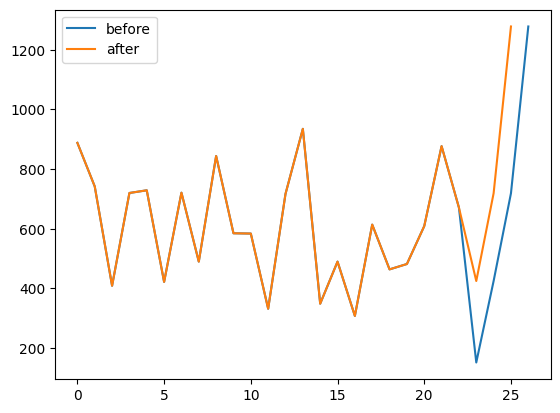

In [8]:
res_group = list(res.groupby("discipline"))
res_lens = [len(item[1]) for item in res_group]

plt.plot([x for x in range(len(res_group))], res_lens, label="before")

res_group = [item for item in res_group if len(item[1]) > 200]
res_lens = [len(item[1]) for item in res_group]
print(min(res_lens))
plt.plot([x for x in range(len(res_group))], res_lens, label="after")
plt.legend(loc="best")
print(res_group[0])

In [9]:
# 将去除掉test的train数据，按照每个类5个样例拆分成5*26一个的batch
import random

res = []
for i in range(50):
    temp = []
    for idx, item in enumerate(res_group):
        _, s = item[0], item[1]
        res_group[idx] = [_, s]
        samples = s.sample(5, replace=False)
        temp.append(samples)
        res_group[idx][1] = res_group[idx][1].drop(samples.index)
    res.append(temp)

In [10]:
import numpy as np

res = np.array(res)
res = res.reshape((-1, 2))
print(res.shape)

(6500, 2)


In [15]:
res = pd.DataFrame(res, columns=[["abstract", "label"]])
res.to_csv("./engineer_train_50_bs.tsv", sep="\t", index=False)